<a href="https://colab.research.google.com/github/PhDSGilber/Tradicional-NLP/blob/main/NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NATURAL LANGUAGE PROCESSING**

# **Requirements and libraries**

In [1]:
!pip install datasets
!pip install -U spacy
!python -m spacy download es_core_news_sm
!pip install stanza
!pip install transformers
!pip install pandas tabulate
!pip install genesim
!wget http://lvdmaaten.github.io/tsne/code/tsne_python.zip
!unzip '/content/tsne_python.zip'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
2023-11-

In [5]:
import pandas as pd
from datasets import load_dataset
import nltk
from nltk.tokenize import (TreebankWordTokenizer,
                          word_tokenize,
                          wordpunct_tokenize,
                          TweetTokenizer,
                          MWETokenizer)
from nltk.corpus import stopwords
import spacy
import stanza
from transformers import BertTokenizer,XLMRobertaTokenizer,CamembertTokenizer
import re
import string
from gensim.models import FastText
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import multiprocessing
from matplotlib import pyplot as plt
import numpy as np
import math
from tsne_python import tsne
import csv
from copy import deepcopy
import random
from tabulate import tabulate

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **European Parliament Proceedings Parallel Corpus Dataset**
---

A corpus of parallel text in 21 European languages from the proceedings of the European Parliament.

The Europarl parallel corpus is extracted from the proceedings of the European Parliament (1996-2011). It includes versions in 21 European languages: Romanic (French, Italian, Spanish, Portuguese, Romanian), Germanic (English, Dutch, German, Danish, Swedish), Slavik (Bulgarian, Czech, Polish, Slovak, Slovene), Finni-Ugric (Finnish, Hungarian, Estonian), Baltic (Latvian, Lithuanian), and Greek. Parallel sentence counts are in the range 400K-2M, depending on the language combination.

The goal of the extraction and processing was to generate sentence aligned text for statistical machine translation systems. For this purpose we extracted matching items and labeled them with corresponding document IDs. Using a preprocessor we identified sentence boundaries. We sentence aligned the data using a tool based on the Church and Gale algorithm.

The Europarl corpus was collected mainly to aid research in statistical machine translation (training, evaluation), but it has been used for many other natural language problems: word sense disambiguation, anaphora resolution, information extraction, etc.

Monolingual datasets are also available for 9 languages. These are supersets of the parallel versions. Monolingual word counts are in the range 7M-54M, depending on the language.

Reference: [European Parliament Proceedings Parallel Corpus 1996-2011](https://www.statmt.org/europarl/)

In [ ]:
#4.1 Dataset import and check rows
dataset = load_dataset('large_spanish_corpus','Europarl')

print('The number of rows for dataset Europarl-Spanish is: ',dataset["train"].num_rows)

Generating train split:   0%|          | 0/2174141 [00:00<?, ? examples/s]

The number of rows for dataset Europarl-Spanish is:  2174141


In [ ]:
#4.1.2 convert datasets to list of lists and tokenize by words

#convert list to list
train_dataset = dataset["train"]
list_of_list_dataset = []

for example in train_dataset:
    text = [example['text']]
    list_of_list_dataset.append(text)

#convert datset to pair number
if len(list_of_list_dataset) % 2 != 0:
  the_last_data = list_of_list_dataset.pop()

In [ ]:
def save_csv(path,list_data):

  with open(path, 'w', newline='', encoding='utf-8') as file_csv:
    reader_csv = csv.writer(file_csv)

    for rows in list_data:
        reader_csv.writerow(rows)


In [ ]:
def upload_csv(path):
  with open(path, 'r', newline='', encoding='utf-8') as file_csv:
    read_csv = csv.reader(file_csv)
    list_preload = list(read_csv)

    return list_preload

In [ ]:
#tokenize by words

#Preload
path='/content/drive/MyDrive/DOCTORADO/MATERIAS/SEMESTRE_2/PNL/spicy_tok_.csv'

dataset_preload = upload_csv(path)
div_num = [i for i in range(1, len(list_of_list_dataset)+1) if len(list_of_list_dataset) % i == 0]
num_to_save = int(len(list_of_list_dataset)/div_num[5])


#use spicy and "es_core_news_sm"
nlp_spacy = spacy.load("es_core_news_sm")
dataset_token_spicy = deepcopy(dataset_preload)
for ind,row_dataset in enumerate(list_of_list_dataset[len(dataset_preload):]):
  doc = nlp_spacy(row_dataset[0])
  accu = []
  for token in doc:
    accu.append(token.text)
  dataset_token_spicy.append(accu)

  if ((ind+len(dataset_preload)) == num_to_save) or ((ind+len(dataset_preload)) == 2174139):

    if (ind+len(dataset_preload)) == 2174139:
      doc = nlp_spacy(the_last_data[0])
      accu = []

      for token in doc:
        accu.append(token.text)
      dataset_token_spicy.append(accu)
      print('save the last row')

    save_csv(path,dataset_token_spicy)
    num_to_save += int(len(list_of_list_dataset)/div_num[5])
    print('save')


# #use nltk and "TreebankWordTokenizer"
# dataset_token_treebank = []
# toke_treebank = TreebankWordTokenizer()

# for row_dataset in list_of_list_dataset[0:1]:

#   dataset_token_treebank.append(toke_treebank.tokenize(row_dataset[0]))


# #use nltk and "MWETokenizer"
# dataset_token_MWETokenizer = []
# toke_MWETokenizer = MWETokenizer()

# for row_dataset in list_of_list_dataset[0:1]:

#   dataset_token_MWETokenizer.append(toke_MWETokenizer.tokenize(word_tokenize(row_dataset[0])))


# #use nltk and "word_tokenizer"
# dataset_token_word_tokenizer = []

# for row_dataset in list_of_list_dataset[0:1]:

#   dataset_token_word_tokenizer.append(word_tokenize(row_dataset[0]))


# #use nltk and "wordpunct_tokenizer"
# dataset_token_wordpunct_tokenizer = []
# for row_dataset in list_of_list_dataset[0:1]:

#   dataset_token_wordpunct_tokenizer.append(wordpunct_tokenize(row_dataset[0]))


# #use stanza
# nlp_stanza = stanza.Pipeline(lang='es', processors='tokenize')
# dataset_token_stanza = []
# for row_dataset in list_of_list_dataset[0:1]:
#   doc = nlp_stanza(row_dataset[0])
#   accu = []
#   for sentence in doc.sentences:
#     for token in sentence.tokens:
#       accu.append(token.text)
#   dataset_token_stanza.append(accu)


# #use a simple split
# dataset_token_split = []

# for row_dataset in list_of_list_dataset[0:50]:

#   dataset_token_split.append(row_dataset[0].split())


#use transformers options (BertTokenizer,XLMRobertaTokenizer,CamembertTokenizer)
#XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")
#CamembertTokenizer.from_pretrained("camembert-base")
# toke_transformer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
# dataset_token_transformer = []
# for row_dataset in list_of_list_dataset[0:1]:

#   dataset_token_transformer.append(toke_transformer.tokenize(row_dataset[0]))

In [ ]:
dataset_token_spicy = upload_csv('/content/drive/MyDrive/DOCTORADO/MATERIAS/SEMESTRE_2/PNL/spicy_tok_.csv')

In [ ]:
#View use pandas
dataset_select = dataset_token_spicy[0:10000]
max_columns = max(len(row) for row in dataset_select)
columns_name = ['Word '+str(i+1) for i in range(max_columns)]
df = pd.DataFrame(dataset_select,columns=columns_name)
df = df.fillna('--')
df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,...,Word 196,Word 197,Word 198,Word 199,Word 200,Word 201,Word 202,Word 203,Word 204,Word 205
0,Aprobación,del,acta,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1,El,Acta,de,la,sesión,de,ayer,ha,sido,distribuida,...,--,--,--,--,--,--,--,--,--,--
2,¿,Hay,alguna,observación,?,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
3,Señora,Presidenta,",",con,la,mayor,brevedad,posible,.,--,...,--,--,--,--,--,--,--,--,--,--
4,Se,trata,",",más,que,nada,",",del,acta,de,...,--,--,--,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Puedo,confirmar,que,existe,una,honda,preocupación,en,las,regiones,...,--,--,--,--,--,--,--,--,--,--
9996,Como,ponen,de,relieve,los,informes,de,la,Comisión,",",...,--,--,--,--,--,--,--,--,--,--
9997,Debemos,hacer,un,uso,eficaz,de,los,recursos,disponibles,actualmente,...,--,--,--,--,--,--,--,--,--,--
9998,Por,eso,es,importante,disponer,de,ámbitos,de,colaboración,",",...,--,--,--,--,--,--,--,--,--,--


In [ ]:
#4.1.3 token cleaner
dataset_select_cleaner = []
stop_words = stopwords.words('spanish')
re_punc = re.compile(' [%s]' % re.escape(string.punctuation))

for sentence in dataset_token_spicy:
  newstring = [re.sub(r'[0-9]', '', w) for w in sentence if not w.isdigit()]
  newstring = [w for w in newstring if not w in stop_words]
  newstring = [re_punc. sub('', w) for w in newstring]
  newstring = [re.sub(r'[\!\'\?¿¡\«\(\)\,\.\']', '',w) for w in newstring]
  newstring = [w.lower()for w in newstring ]
  newstring = [w for w in newstring if w.strip()]
  dataset_select_cleaner.append(newstring)

save_csv('/content/drive/MyDrive/DOCTORADO/MATERIAS/SEMESTRE_2/PNL/spicy_tok_clear.csv',dataset_select_cleaner)
#View use pandas
dataset_select = dataset_select_cleaner[0:10000]
max_columns = max(len(row) for row in dataset_select)
columns_name = ['Word '+str(i+1) for i in range(max_columns)]
df = pd.DataFrame(dataset_select,columns=columns_name)
df = df.fillna('--')
df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,...,Word 95,Word 96,Word 97,Word 98,Word 99,Word 100,Word 101,Word 102,Word 103,Word 104
0,aprobación,acta,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1,el,acta,sesión,ayer,sido,distribuida,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
2,hay,alguna,observación,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
3,señora,presidenta,mayor,brevedad,posible,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
4,se,trata,acta,anteayer,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,puedo,confirmar,existe,honda,preocupación,regiones,acerca,pueda,suceder,relación,...,--,--,--,--,--,--,--,--,--,--
9996,como,ponen,relieve,informes,comisión,seguimos,problemas,ejemplo,desempleo,mayores,...,--,--,--,--,--,--,--,--,--,--
9997,debemos,hacer,uso,eficaz,recursos,disponibles,actualmente,propio,puede,aplicar,...,--,--,--,--,--,--,--,--,--,--
9998,por,importante,disponer,ámbitos,colaboración,notable,influencia,regional,forma,utilizar,...,--,--,--,--,--,--,--,--,--,--


In [ ]:
dataset_select_cleaner = upload_csv('/content/drive/MyDrive/DOCTORADO/MATERIAS/SEMESTRE_2/PNL/spicy_tok_clear.csv')

In [ ]:
#4.1.4 Create and definition FastTexT
#https://arxiv.org/pdf/1607.04606.pdf
num_features = 300                        #Dim embeddings
min_word_count = 1                        #Treshold min word count
num_workers = multiprocessing.cpu_count() #Numbert of subprocess
context_size = 5                          #windowd lenght
seed = 1


In [ ]:
#4.1.5 Create file of FastTexT and compare with Word2Vec

"""sentences: list to train FastText
   vector_size: Size of vector for word
   window: Window to considerte number of word in left and right
   min_count: min of word repeate in corpus
   workers: numbers or kernels in CPU
   seed: seed of algorithm
   sg: 1 = Skip-gram, 0 =  CBOW (Continuous Bag of Words)"""

%cd /content/drive/MyDrive/DOCTORADO/MATERIAS/SEMESTRE_2/PNL
#fasttext
fasttext_model = FastText( sentences=dataset_select_cleaner, vector_size=num_features, window=context_size, min_count=min_word_count, workers=num_workers,sg=1)
fasttext_model.wv.save_word2vec_format('./text_fasttext_skip_model' + str(num_features) + '.txt', binary=False)
#Word2Vec
Word2Vec_model = Word2Vec(sentences=dataset_select_cleaner, vector_size=num_features, window=context_size, min_count=min_word_count, workers=num_workers, sg=1)
Word2Vec_model.wv.save_word2vec_format('./text_Word2Vec_skip_model' + str(num_features) + '.txt', binary=False)

/content/drive/MyDrive/DOCTORADO/MATERIAS/SEMESTRE_2/PNL


In [ ]:
%cd /content/drive/MyDrive/DOCTORADO/MATERIAS/SEMESTRE_2/PNL
#fasttext
fasttext_model = KeyedVectors.load_word2vec_format('./text_fasttext_skip_model300.txt')
#Word2Vec
Word2Vec_model = KeyedVectors.load_word2vec_format('./text_Word2Vec_skip_model300.txt')

/content/drive/MyDrive/DOCTORADO/MATERIAS/SEMESTRE_2/PNL


In [ ]:
#Compare two models with top 10 similar for three words
random_words = [random.choice(random.choice(dataset_select_cleaner)) for i in range(3)]
top=10
resultados = []
for word in random_words:
    most_similar_fasttext = fasttext_model.most_similar(word, topn=top)
    most_similar_Word2Ve = Word2Vec_model.most_similar(word, topn=top)

    resultados.append({
        'Word': word,
        'FastText': [item[0] for item in most_similar_fasttext],
        'Similarity_f': [item[1] for item in most_similar_fasttext],
        'Word2Vec': [item[0] for item in most_similar_Word2Ve],
        'Similarity_w': [item[1] for item in most_similar_Word2Ve],
    })

df = pd.DataFrame(resultados)

for i, row in df.iterrows():
    print(f"Word: {row['Word']}")
    print(tabulate({'FastText': row['FastText'], 'Similarity_f': row['Similarity_f'], 'Word2Vec': row['Word2Vec'], 'Similarity_w': row['Similarity_w']}, headers='keys', tablefmt='pretty'))
    print("\n")

Word: período
+--------------+--------------------+-------------+--------------------+
|   FastText   |    Similarity_f    |  Word2Vec   |    Similarity_w    |
+--------------+--------------------+-------------+--------------------+
|   periodo    | 0.9431158900260925 |   periodo   | 0.9375325441360474 |
|   -período   | 0.9236814379692078 | quinquenio  | 0.6578112840652466 |
|  períodoha   | 0.9005126357078552 | transitorio | 0.6400948762893677 |
| período&#;-  | 0.8978501558303833 |  periodos   | 0.5859772562980652 |
| período-tipo | 0.895774245262146  |  septenio   | 0.5819448232650757 |
| mini-período | 0.8502900004386902 |  períodos   | 0.5662308931350708 |
| miniperíodo  | 0.8247101306915283 |   parcial   | 0.5634356737136841 |
|  períodica   | 0.7946503162384033 |   trienio   | 0.5597383379936218 |
|   período-   | 0.7932746410369873 |     ---     | 0.5451151132583618 |
| miniperiodo  | 0.7824478149414062 |  escalona   | 0.5386985540390015 |
+--------------+--------------------+

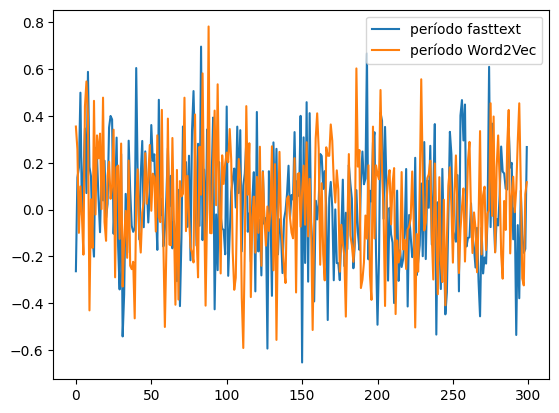

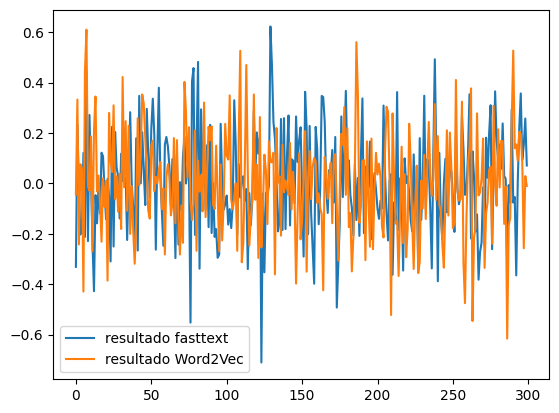

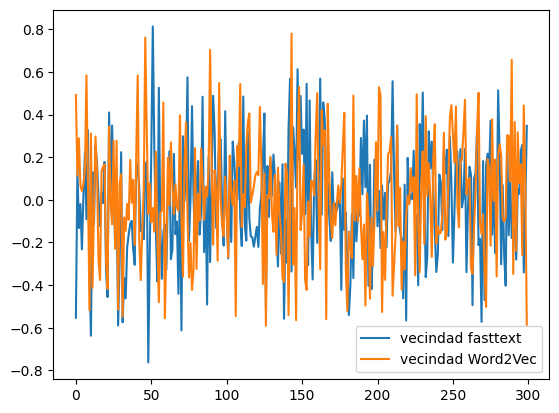

In [ ]:
#plot 3 vectors for model fasttext vs Word2Vec
for rand_word in random_words:
  plt.plot(fasttext_model[rand_word][:], label = str(rand_word)+' fasttext')
  plt.plot(Word2Vec_model[rand_word][:], label = str(rand_word)+' Word2Vec')
  plt.legend()
  plt.show()

In [ ]:
def sim(q, d):
    a = sum(qi * di for qi, di in zip(q, d))
    b = math.sqrt(sum(qi ** 2 * di ** 2 for qi, di in zip(q, d)))
    return a / b

def cos(q, d):
    a = sum(qi * di for qi, di in zip(q, d))
    b = math.sqrt(sum(qi ** 2 for qi in q))
    c = math.sqrt(sum(di ** 2 for di in d))
    return a / (b * c)

In [ ]:
#Compare similarity and cosine similarity for model fasttext vs Word2Vec
word_embeddings_fasttext = {word: fasttext_model[random_words[0]] for word in fasttext_model.index_to_key}
word_embeddings_Word2Vec = {word: Word2Vec_model[random_words[0]] for word in Word2Vec_model.index_to_key}

sim_with_fast_word = []
simcos_with_fast_word = []

for step in range(len(word_embeddings_fasttext)):
  sim_with_fast_word.append(sim(list(word_embeddings_fasttext.values())[step],list(word_embeddings_Word2Vec.values())[step]))
  simcos_with_fast_word.append(cos(list(word_embeddings_fasttext.values())[step],list(word_embeddings_Word2Vec.values())[step]))

df = pd.DataFrame([list(word_embeddings_fasttext.keys()),sim_with_fast_word,simcos_with_fast_word]).T
df.columns = columns=['Word/Token','Similarity','Cosine similarity']
df

,Word/Token,Similarity,Cosine similarity
0,comisión,1.532141,0.083411
1,europea,1.532141,0.083411
2,señor,1.532141,0.083411
3,en,1.532141,0.083411
4,unión,1.532141,0.083411
...,...,...,...
169728,entitades,1.532141,0.083411
169729,gaitero,1.532141,0.083411
169730,minimizadoras,1.532141,0.083411
169731,diversicación,1.532141,0.083411


In [ ]:
# Visualizing embeddings with t-sne
# %cd /content/tsne_python
# from tsne import tsne
# reduced_matrix_fasttext = tsne(np.array(list(word_embeddings_fasttext.values())), 2)
# reduced_matrix_Word2Vec = tsne(np.array(list(word_embeddings_Word2Vec.values())), 2)

# plt.figure(figsize=(12, 12), dpi=90)

# plt.scatter(reduced_matrix_fasttext[:, 0], reduced_matrix_fasttext[:, 1],reduced_matrix_fasttext[:, 0].shape[0]);

# for idx, word in enumerate(list(word_embeddings_fasttext.keys())):
#   x = reduced_matrix_fasttext[idx, 0]
#   y = reduced_matrix_fasttext[idx, 1]
#   plt.annotate(word + ' Fasttext', (x,y),color='b')

# plt.scatter(reduced_matrix_Word2Vec[:, 0], reduced_matrix_Word2Vec[:, 1],reduced_matrix_Word2Vec[:, 0].shape[0]);

# for idx, word in enumerate(list(word_embeddings_Word2Vec.keys())):
#   x = reduced_matrix_Word2Vec[idx, 0]
#   y = reduced_matrix_Word2Vec[idx, 1]
#   plt.annotate(word + ' Word2Vec', (x,y),color='orange')


# plt.show()

# **Word2Vec From Scratch**
---

This is a step by step or scratch of the Word2vec algorithm, which uses a mutinomial or Softmax logistic regression model as a three-layer neural network (1 input layer, 1 hidden layer and 1 output layer) producing the vector representation of the words closest to each center word in a given vocabulary that is not annotated by hand but rather the training set is formed from the co-occurrence with a fixed and parameterizable window of the center words with their contextual words. In summary, the algorithm has three parts.


1.   Preprocessing of the training and testing sets and the matrix reduction of the input vocabulary to the embedding dimension
2.   Hidden representation of the input vectors.
3.   Obtaining the context vectors of the input vector and vector representation of the input and context vectors

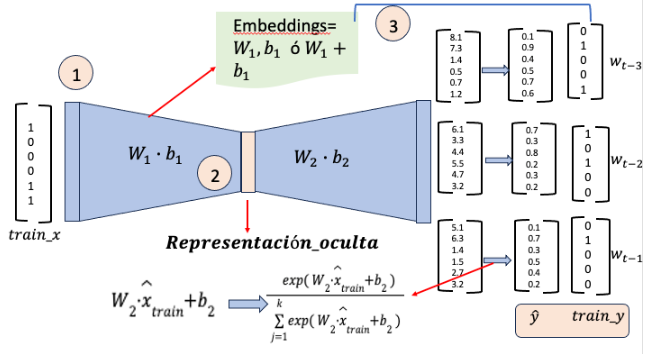

Reference: [Word2Vec_Scratch](https://github.com/sudharsan13296/Word2vec-from-scratch/blob/master/word2vec%20scratch.ipynb)

In [101]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
corpus_100_años = "Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos."
corpus_100_años = re.sub(r'\b(\w+)[.,]', r'\1', corpus_100_años)
corpus_raw = corpus_100_años.lower()

words = []
for word in corpus_raw.split():
  if word != '.':
    words.append(word) # because we don't want to treat . as a word
    print(word)


words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
print(vocab_size)

In [67]:
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

sentences = [sen for sen in sentences if sen]


In [68]:
WINDOW_SIZE = 3

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] :
            if nb_word != word:
                data.append([word, nb_word])

In [69]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [70]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
    #print(data_word[0],data_word[1])
    #print(x_train,y_train)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

#print(x_train,'parejas',y_train,'\n')
    #print(data_word[0],y_train)
# convert them to numpy arrays


print('conjunto X de entrenamiento---------')
print(x_train,y_train,'\n')
#print(x_train.shape)
#print('conjunto Y de entrenamiento---------')
#print(y_train)
#print(y_train.shape)

conjunto X de entrenamiento---------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 



In [71]:
# Se reserva el espacio para x_train y y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 50 # Este es el embeddingd de las palabras
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)
print(hidden_representation.shape)
print(b1)

(?, 50)
<tf.Variable 'Variable_1:0' shape=(50,) dtype=float32_ref>


In [123]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

class Word2vecModel:

  def __init__(self):
        self.sess = tf.Session()
        self.init = tf.global_variables_initializer()
        self.sess.run(self.init)

  def create(self, EMBEDDING_DIM, vocab_size):
      self.x = tf.placeholder(tf.float32, shape=(None, vocab_size))
      self.y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

      self.W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
      self.b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))  # bias

      self.hidden_representation = tf.add(tf.matmul(self.x, self.W1), self.b1)

      self.W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
      self.b2 = tf.Variable(tf.random_normal([vocab_size]))

      self.prediction = tf.nn.softmax(tf.add(tf.matmul(self.hidden_representation, self.W2), self.b2))

      self.sess.run(tf.variables_initializer([self.W1, self.b1, self.W2, self.b2]))


  def fit(self, epochs, x_train, y_train):
      cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(self.y_label * tf.log(self.prediction), reduction_indices=[1]))
      train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

      for _ in range(epochs):
          self.sess.run(train_step, feed_dict={self.x: x_train, self.y_label: y_train})
          print('loss is : ', self.sess.run(cross_entropy_loss, feed_dict={self.x: x_train, self.y_label: y_train}))

      self.vectors = self.sess.run(self.W1 + self.b1)

  def embedding(self, wordint):
      return self.vectors[wordint]

  def euclidean_dist(self, vec1, vec2):
      return np.sqrt(np.sum((vec1 - vec2) ** 2))

  def find_closest(self, word_index):
      min_dist = 10000
      min_index = -1
      query_vector = self.vectors[word_index]
      for index, vector in enumerate(self.vectors):
          if self.euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
              min_dist = self.euclidean_dist(vector, query_vector)
              min_index = index
      return min_index


In [200]:
word2vec_50 = Word2vecModel()

In [201]:
word2vec_50.create(EMBEDDING_DIM=50,vocab_size=vocab_size)

In [202]:
word2vec_50.fit(epochs=1000,x_train=x_train,y_train=y_train)

loss is :  19.908743
loss is :  18.92055
loss is :  18.188923
loss is :  17.620201
loss is :  17.155182
loss is :  16.760588
loss is :  16.40995
loss is :  16.092194
loss is :  15.802362
loss is :  15.535847
loss is :  15.288455
loss is :  15.056672
loss is :  14.837672
loss is :  14.629325
loss is :  14.430087
loss is :  14.238872
loss is :  14.054912
loss is :  13.877653
loss is :  13.706687
loss is :  13.54171
loss is :  13.382493
loss is :  13.228872
loss is :  13.080725
loss is :  12.93795
loss is :  12.800462
loss is :  12.668166
loss is :  12.540949
loss is :  12.418655
loss is :  12.301082
loss is :  12.1879635
loss is :  12.078972
loss is :  11.973739
loss is :  11.871881
loss is :  11.773038
loss is :  11.676888
loss is :  11.58318
loss is :  11.491713
loss is :  11.402336
loss is :  11.314952
loss is :  11.229487
loss is :  11.145897
loss is :  11.064146
loss is :  10.984215
loss is :  10.906076
loss is :  10.829704
loss is :  10.755062
loss is :  10.682107
loss is :  10.610

In [203]:
word2vec_50.embedding(wordint = word2int['aguas'])

array([-1.0299901 , -0.62222004,  0.8254019 , -0.83520865,  0.2827567 ,
        0.81350315, -1.1664116 , -1.6605115 ,  2.1711516 , -1.0678993 ,
       -1.5510638 , -1.4343277 ,  1.5780077 ,  0.39589673, -1.6193644 ,
       -0.20252827,  0.31312436,  0.26748657,  1.3521402 , -0.1208955 ,
       -0.22781068,  1.4418479 ,  1.8060445 ,  1.6981254 ,  2.8562765 ,
        1.6727358 , -0.84881794, -0.91036   ,  1.8218274 , -1.5150026 ,
       -1.7569811 ,  0.4435535 , -1.4915763 ,  0.865086  , -0.19768697,
        1.129591  , -0.3173029 ,  1.0785496 , -0.8954493 ,  2.3743763 ,
       -0.4518059 ,  0.12594175, -1.5855682 ,  1.2626051 , -0.12740275,
        1.7321402 ,  0.76446855,  1.3438239 ,  0.25835976, -0.26255542],
      dtype=float32)

In [204]:
closet_50 = []
for word in word2int.keys():
  par = []
  par.append(word)
  par.append(int2word[word2vec_50.find_closest(word2int[word])])
  closet_50.append(par)


df_closet_50 = pd.DataFrame(closet_50, columns=['Word','Word closet'])
df_closet_50

,Word,Word closet
0,un,que
1,construidas,conocer
2,lecho,construidas
3,aldea,casas
4,y,había
5,muchos,se
6,por,el
7,aquella,de
8,que,fusilamiento
9,orilla,veinte


In [205]:
word2vec_30 = Word2vecModel()

In [206]:
word2vec_30.create(EMBEDDING_DIM=30,vocab_size=vocab_size)

In [207]:
word2vec_30.fit(epochs=1000,x_train=x_train,y_train=y_train)

loss is :  16.448092
loss is :  15.809503
loss is :  15.277054
loss is :  14.830499
loss is :  14.454304
loss is :  14.130764
loss is :  13.844066
loss is :  13.584246
loss is :  13.345863
loss is :  13.125644
loss is :  12.921285
loss is :  12.730964
loss is :  12.553166
loss is :  12.386606
loss is :  12.230172
loss is :  12.082912
loss is :  11.943982
loss is :  11.812623
loss is :  11.688122
loss is :  11.569813
loss is :  11.457066
loss is :  11.349302
loss is :  11.245998
loss is :  11.146688
loss is :  11.050966
loss is :  10.958483
loss is :  10.868944
loss is :  10.782097
loss is :  10.69773
loss is :  10.615666
loss is :  10.535757
loss is :  10.457878
loss is :  10.381922
loss is :  10.307797
loss is :  10.235426
loss is :  10.164737
loss is :  10.09567
loss is :  10.028166
loss is :  9.962172
loss is :  9.897637
loss is :  9.834511
loss is :  9.77275
loss is :  9.712303
loss is :  9.653126
loss is :  9.595173
loss is :  9.5384
loss is :  9.482761
loss is :  9.428216
loss is

In [208]:
word2vec_30.embedding(wordint = word2int['aguas'])

array([ 0.0858468 ,  0.31653613,  0.7927214 ,  1.4310055 , -1.7445974 ,
       -0.14769113, -0.24356763,  0.3117717 , -1.8095661 ,  2.960598  ,
       -0.28415018, -0.6649413 ,  0.13589114, -0.42096096, -0.37301242,
       -0.7337939 , -1.6147991 , -1.1303018 , -0.09691888,  1.1236393 ,
        0.23161095,  0.10148871,  1.1666026 ,  0.77804315,  0.5073247 ,
       -1.0643687 ,  1.4438379 ,  0.28439015,  0.57451314,  0.06013149],
      dtype=float32)

In [209]:
closet_30 = []
for word in word2int.keys():
  par = []
  par.append(word)
  par.append(int2word[word2vec_30.find_closest(word2int[word])])
  closet_30.append(par)

df_closet_30 = pd.DataFrame(closet_30, columns=['Word','Word closet'])
df_closet_30

,Word,Word closet
0,un,diáfanas
1,construidas,después
2,lecho,un
3,aldea,a
4,y,fusilamiento
5,muchos,buendía
6,por,entonces
7,aquella,aureliano
8,que,y
9,orilla,de


/content/tsne_python
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 54...
Mean value of sigma: 3.492031
Iteration 10: error is 10.518497
Iteration 20: error is 10.839847
Iteration 30: error is 13.065026
Iteration 40: error is 13.562790
Iteration 50: error is 13.772561
Iteration 60: error is 12.503427
Iteration 70: error is 11.901805
Iteration 80: error is 12.019837
Iteration 90: error is 11.689177
Iteration 100: error is 11.933308
Iteration 110: error is 1.158890
Iteration 120: error is 1.039667
Iteration 130: error is 0.973568
Iteration 140: error is 0.939507
Iteration 150: error is 0.896384
Iteration 160: error is 0.842576
Iteration 170: error is 0.803855
Iteration 180: error is 0.768407
Iteration 190: error is 0.749653
Iteration 200: error is 0.737593
Iteration 210: error is 0.727364
Iteration 220: error is 0.715297
Iteration 230: error is 0.703854
Iteration 240: error is 0.688728
Iteration 250: error is 0.680264
Iteration 260: 

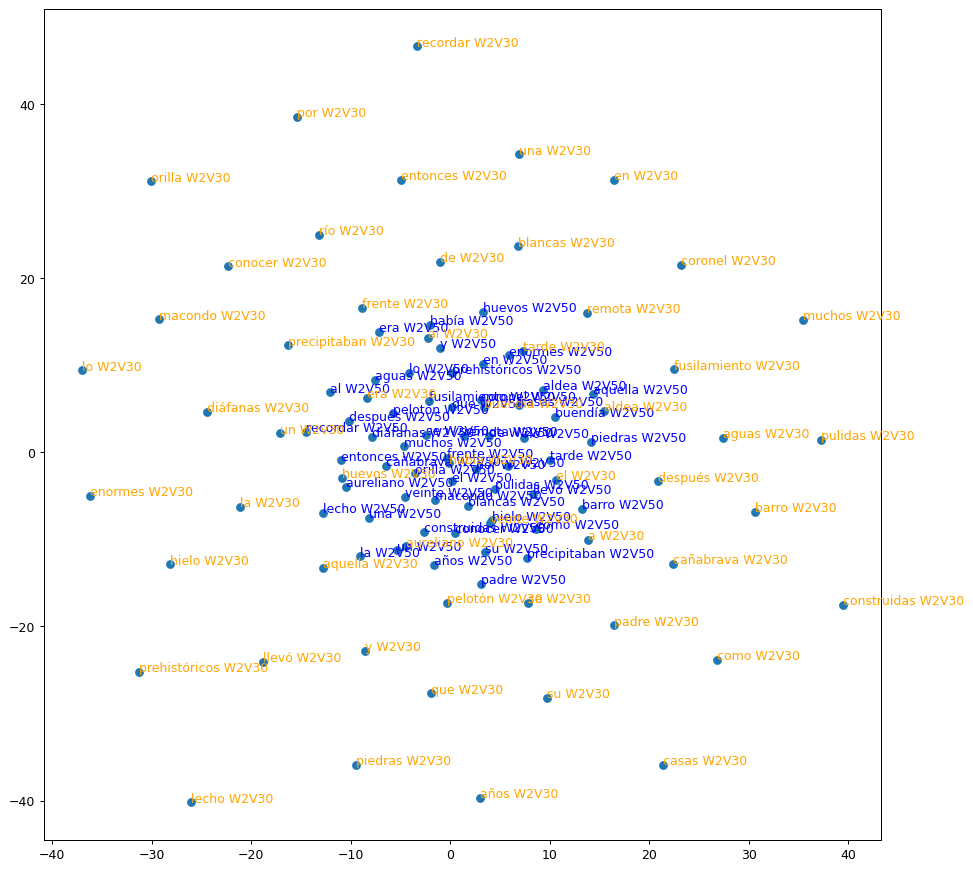

In [210]:
#Visualizing embeddings with t-sne
%cd /content/tsne_python
from tsne import tsne

embed_50_tsne = tsne(np.array([word2vec_50.embedding(wordint = word2int[wor]) for wor in word2int.keys() ]),2)
embed_30_tsne = tsne(np.array([word2vec_30.embedding(wordint = word2int[wor]) for wor in word2int.keys() ]),2)
plt.figure(figsize=(12, 12), dpi=90)

total_embed = np.concatenate((embed_50_tsne, embed_30_tsne), axis=0)
plt.scatter(total_embed[:, 0],total_embed[:, 1]);

for idx, word in enumerate(word2int.keys()):
  x = embed_50_tsne[idx, 0]
  y = embed_50_tsne[idx, 1]
  plt.annotate(word + ' W2V50', (x,y),color='blue')

for idx, word in enumerate(word2int.keys()):
  x = embed_30_tsne[idx, 0]
  y = embed_30_tsne[idx, 1]
  plt.annotate(word + ' W2V30', (x,y),color='orange')

plt.show()